In [10]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from astropy.table import Table
from merger_analysis import athena_read as ar
from glob import glob
from merger_analysis import OrbitAnalysisUtils as ou
from Constants import Constants
import read_mist_models
import seaborn as sns

c=Constants()

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

Constants defined...


In [2]:
def get_midplane_theta(myfile,level=0):
    dblank=ar.athdf(myfile,level=level,quantities=[],subsample=True)

    # get closest to midplane value
    return dblank['x2v'][ np.argmin(np.abs(dblank['x2v']-np.pi/2.) ) ]

In [3]:
base_dir = "data/"
#base_dir = ""

orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

tperi = orb[np.argmin(orb['sep'])]['time']
print("tperi=",tperi)

reading orbit file for binary simulation...
tperi= 15000.45


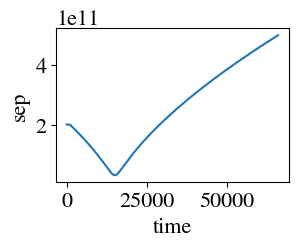

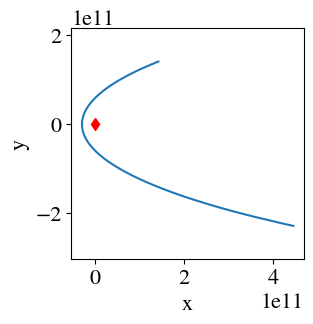

In [4]:
plt.figure(figsize=(3,2))
plt.plot(orb['time'],orb['sep'],'-')
plt.xlabel('time')
plt.ylabel('sep')
plt.show()

plt.figure(figsize=(3,3))
plt.plot(orb['x'],orb['y'],'-')
plt.plot([0],[0],'rd')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Slicing at x2= 1.5544374
read_data...reading file data/TDE.out4.00040.athdf
 ...file read, constructing arrays
 ...gamma= 5
...getting cartesian arrays...
...getting energy arrays...
40000.207
245950074198.54865 -177123192066.6063
Slicing at x2= 1.5544374
read_data...reading file data/TDE.out1.00004.athdf


/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_24079/486968784.py:31: RuntimeWarning: invalid value encountered in sqrt
  d['vinf'] = np.sqrt(2*d['E'])
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_24079/486968784.py:37: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(ou.get_plot_array_midplane(d['x'][:,0,:]),


 ...file read, constructing arrays
 ...gamma= 5
...getting cartesian arrays...
...getting energy arrays...
40000.207
245950074198.54865 -177123192066.6063


/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_24079/486968784.py:79: RuntimeWarning: invalid value encountered in sqrt
  d['vinf'] = np.sqrt(2*d['E'])


<Figure size 1200x800 with 0 Axes>

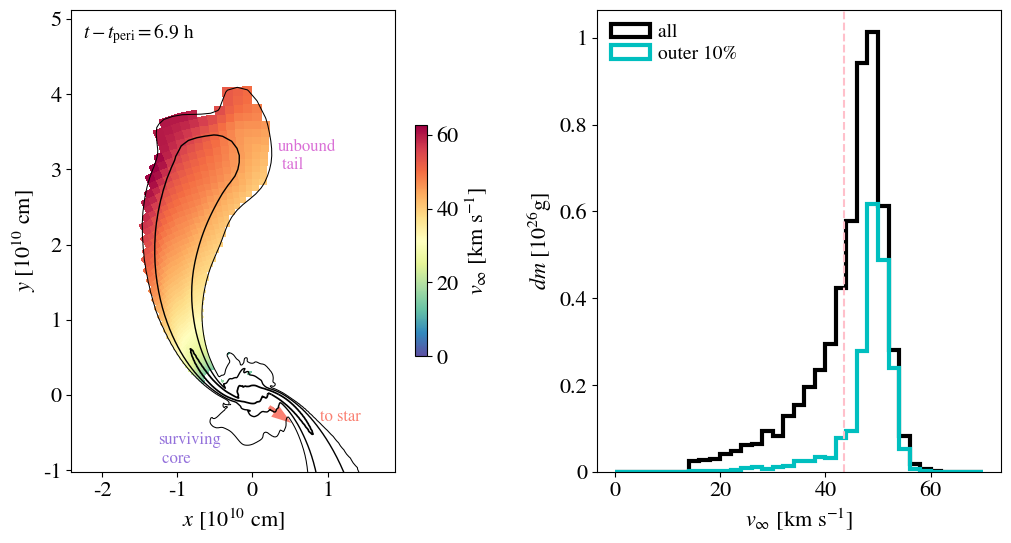

In [7]:
def add_contour():
    plt.contour(ou.get_plot_array_midplane(d['x'][:,0,:]),
              ou.get_plot_array_midplane(d['y'][:,0,:]),
              np.log10(ou.get_plot_array_midplane( np.where(d['r0']>0,d['r0']*d['rho'],np.nan))[:,0,:] ),colors='k',
                levels=[-6,-4,-2],linestyles='-',linewidths=[0.75,1.,1.25] )


plt.figure(figsize=(12,8) )
lim=6.4e8*80
r0thresh=1e-6


myfile = base_dir+"TDE.out4.00040.athdf"
mylevel = 0

x2slicevalue=get_midplane_theta(myfile,level=mylevel)
print( "Slicing at x2=",x2slicevalue)

d=ou.read_data(myfile,orb,level=mylevel,get_cartesian=True,get_torque=False,get_energy=True,
               x2_min=x2slicevalue,x2_max=x2slicevalue,gamma=5)

t= d['Time']
rcom,vcom = ou.rcom_vcom(orb,t)
x2,y2,z2 = ou.pos_secondary(orb,t)
print( t)
print(x2,y2)

dist2 = np.sqrt( (d['x']-x2)**2 + (d['y']-y2)**2 + (d['z']-z2)**2 )
d['E'] = -d['r7']+d['ek']/d['rho']-c.G*orb['m2'][0]/dist2
d['Eframe'] = -d['r7']+0.5*(d['vx']**2 + d['vy']**2 + d['vz']**2)
d['vinf'] = np.sqrt(2*d['E'])



plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pcolormesh(ou.get_plot_array_midplane(d['x'][:,0,:]),
              ou.get_plot_array_midplane(d['y'][:,0,:]),
              ou.get_plot_array_midplane( np.where((d['r0']*d['rho']>r0thresh)&(d['Eframe']>0),d['vinf'],np.nan))[:,0,:]/1e5 ,
              cmap=plt.cm.Spectral_r ,vmin=0,rasterized=True)
plt.plot(x2,y2,'ro')
d2 = np.sqrt(x2**2 +y2**2)
plt.colorbar(label=r"$v_\infty$ [km s$^{-1}$]",orientation='vertical',shrink=0.5)
plt.axis('equal')
plt.xlim(-0.4*lim,0.3*lim)
plt.ylim(-0.2*lim,lim)
add_contour()
plt.xlabel('$x$ [$10^{10}$ cm]')
plt.ylabel('$y$ [$10^{10}$ cm]')
plt.xticks([-2e10,-1e10,0,1e10],[-2,-1,0,1])
plt.yticks([-1e10,0,1e10,2e10,3e10,4e10,5e10],[-1,0,1,2,3,4,5])

plt.arrow(3e9*x2/d2,3e9*y2/d2,1e9*x2/d2,1e9*y2/d2,head_width=1e9,color='Salmon',lw=3)
    
plt.annotate('surviving\n core',(-1.25e10,-0.9e10),color='mediumpurple',fontsize=12)
plt.annotate('unbound\n tail',(0.34e10,3e10),color='orchid',fontsize=12)
plt.annotate('to star',(0.9e10,-3.5e9),color='Salmon',fontsize=12)
plt.annotate(r'$t-t_{\rm peri} = $'+str(np.round(np.where(t-tperi<1,0,t-tperi)/3600.,1))+" h",(-2.25e10,4.75e10),fontsize=14)

# Now do the same thing with a full snapshot... 

myfile = base_dir+"TDE.out1.00004.athdf"
mylevel = 0

x2slicevalue=get_midplane_theta(myfile,level=mylevel)
print( "Slicing at x2=",x2slicevalue)

d=ou.read_data(myfile,orb,level=mylevel,get_cartesian=True,get_torque=False,get_energy=True,gamma=5)

t= d['Time']
rcom,vcom = ou.rcom_vcom(orb,t)
x2,y2,z2 = ou.pos_secondary(orb,t)
print( t)
print(x2,y2)

dist2 = np.sqrt( (d['x']-x2)**2 + (d['y']-y2)**2 + (d['z']-z2)**2 )
d['E'] = -d['r7']+d['ek']/d['rho']-c.G*orb['m2'][0]/dist2
d['Eframe'] = -d['r7']+0.5*(d['vx']**2 + d['vy']**2 + d['vz']**2)
d['vinf'] = np.sqrt(2*d['E'])




plt.subplot(1,2,2)
mybins = np.linspace(0,70,36)

selall = (d['r0']>0.5) & (d['Eframe']>0)
plt.hist(d['vinf'][selall]/1e5,weights=(d['r0']*d['rho']*d['dvol'])[selall],histtype='step',color='k',lw=3, 
         bins=mybins ,label=' all'  )

selsurf = selall & (d['r1']>0.90*6e8) & (d['r1']<1*6e8)
plt.hist(d['vinf'][selsurf]/1e5,weights=(d['r0']*d['rho']*d['dvol'])[selsurf],histtype='step',color='c',lw=3, 
         bins=mybins ,label=' outer 10%'  )

plt.legend(loc='upper left')
#plt.semilogy()
plt.xlabel(r"$v_\infty$ [km s$^{-1}$]")

rperi = np.min(orb['sep'])
plt.axvline( np.sqrt(2*c.G*2e32*6.4e8/rperi**2 )/1e5 , ls='--',color='pink') 
plt.ylabel('$dm$ [$10^{26} $g]')
plt.yticks([0,0.2e26,0.4e26,0.6e26,0.8e26,1e26],[0,0.2,0.4,0.6,0.8,1])




plt.subplots_adjust(wspace=0.3)

plt.savefig("figs/vinf_combo2.pdf",bbox_inches='tight')

Slicing at x2= 1.5544374
read_data...reading file data/TDE.out4.00015.athdf
 ...file read, constructing arrays
 ...gamma= 5
...getting cartesian arrays...
...getting energy arrays...
15000.446
read_data...reading file data/TDE.out4.00016.athdf
 ...file read, constructing arrays
 ...gamma= 5
...getting cartesian arrays...
...getting energy arrays...
16000.323
read_data...reading file data/TDE.out4.00018.athdf


/Users/morganmacleod/Dropbox/CE_princeton/PlanetTDE/Analysis/merger_analysis/OrbitAnalysisUtils.py:392: RuntimeWarning: overflow encountered in power
  resultlist = [-2./eps * (1./3.*u**2 -0.15*u**4 + 0.05*u**5) + 7./(5.*eps),
/Users/morganmacleod/Dropbox/CE_princeton/PlanetTDE/Analysis/merger_analysis/OrbitAnalysisUtils.py:392: RuntimeWarning: invalid value encountered in add
  resultlist = [-2./eps * (1./3.*u**2 -0.15*u**4 + 0.05*u**5) + 7./(5.*eps),
/Users/morganmacleod/Dropbox/CE_princeton/PlanetTDE/Analysis/merger_analysis/OrbitAnalysisUtils.py:393: RuntimeWarning: overflow encountered in power
  -1./(15.*r) - 1/eps*( 4./3.*u**2 - u**3 + 0.3*u**4 -1./30.*u**5) + 8./(5.*eps),
/Users/morganmacleod/Dropbox/CE_princeton/PlanetTDE/Analysis/merger_analysis/OrbitAnalysisUtils.py:393: RuntimeWarning: invalid value encountered in subtract
  -1./(15.*r) - 1/eps*( 4./3.*u**2 - u**3 + 0.3*u**4 -1./30.*u**5) + 8./(5.*eps),
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_24079/216582

 ...file read, constructing arrays
 ...gamma= 5
...getting cartesian arrays...
...getting energy arrays...
18000.467
read_data...reading file data/TDE.out4.00021.athdf
 ...file read, constructing arrays
 ...gamma= 5
...getting cartesian arrays...
...getting energy arrays...
21000.816


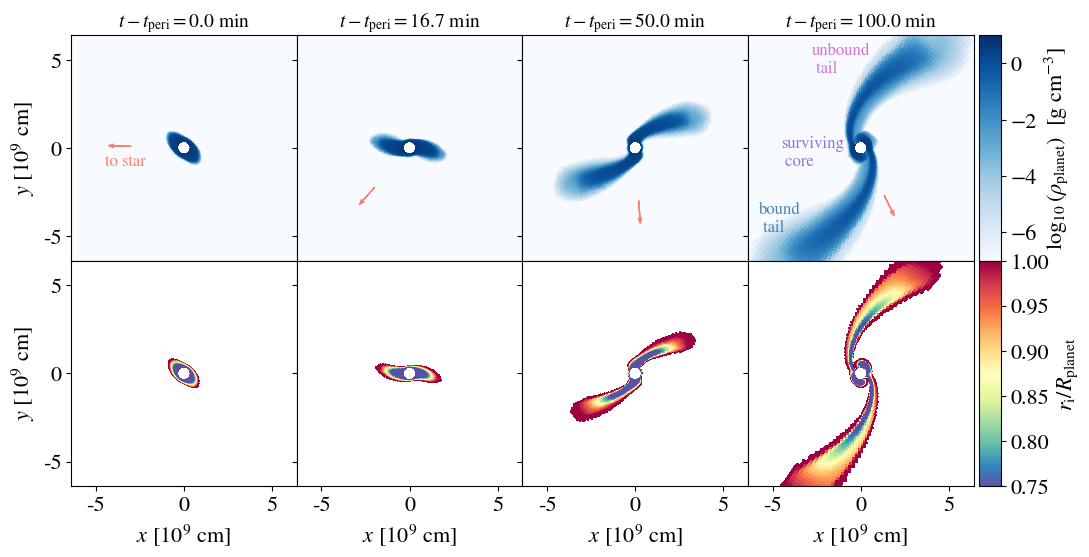

In [11]:
filelist=[base_dir+"TDE.out4.00015.athdf",
         base_dir+"TDE.out4.00016.athdf",
         base_dir+"TDE.out4.00018.athdf",
         base_dir+"TDE.out4.00021.athdf"]

lim = 10*6.4e8

mylevel = 0
x2slicevalue=get_midplane_theta(filelist[0],level=mylevel)
print( "Slicing at x2=",x2slicevalue)


from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(12., 6.))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="edge",
                 cbar_size='10%',
                 axes_pad=0,
                 cbar_pad=0.05)


for i,fn in enumerate(filelist):
    d=ou.read_data(fn,orb,level=mylevel,get_cartesian=True,get_torque=False,get_energy=True,
               x2_min=x2slicevalue,x2_max=x2slicevalue,gamma=5)

    t= d['Time']
    rcom,vcom = ou.rcom_vcom(orb,t)
    x2,y2,z2 = ou.pos_secondary(orb,t)
    print( t)
 
    im=grid[i].pcolormesh(ou.get_plot_array_midplane(d['x'][:,0,:]),
              ou.get_plot_array_midplane(d['y'][:,0,:]),
              np.log10(ou.get_plot_array_midplane( np.where(d['r0']>0.,d['rho']*d['r0'],np.nan))[:,0,:] ),
              cmap=plt.cm.Blues,vmin=-7,vmax=1,rasterized=True)
    cb=plt.colorbar(im,cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho_{\rm planet} \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    grid[i].set_xlim(-lim,lim)
    grid[i].set_ylim(-lim,lim)
    grid[i].set_xticks([-5e9,0,5e9],[-5,0,5])
    grid[i].set_yticks([-5e9,0,5e9],[-5,0,5])
    grid[i].set_xlabel('$x$ [$10^9$ cm]')
    grid[i].set_ylabel('$y$ [$10^9$ cm]')
    grid[i].set_title(r'$t-t_{\rm peri} = $'+str(np.round(np.where(t-tperi<1,0,t-tperi)/60.,1))+" min",fontsize=14)
    d2 = np.linalg.norm([x2,y2])
    grid[i].arrow(3e9*x2/d2,3e9*y2/d2,1e9*x2/d2,1e9*y2/d2,head_width=0.2e9,color='Salmon')
    
    
    im=grid[i+4].pcolormesh(ou.get_plot_array_midplane(d['x'][:,0,:]),
              ou.get_plot_array_midplane(d['y'][:,0,:]),
              ou.get_plot_array_midplane( np.where(d['r0']>0.5,d['r1']/6.4e8,np.nan))[:,0,:] ,
              cmap=plt.cm.Spectral_r,vmin=0.75,vmax=1,rasterized=True)
    plt.plot(x2,y2,'ro')
    cb=plt.colorbar(im,cax=grid.cbar_axes[1],label=r'$r_{\rm i}/R_{\rm planet}$')
    cb.solids.set_edgecolor('face')
    #plt.axis('equal')
    grid[i+4].set_xlim(-lim,lim)
    grid[i+4].set_ylim(-lim,lim)
    grid[i+4].set_xticks([-5e9,0,5e9],[-5,0,5])
    grid[i+4].set_yticks([-5e9,0,5e9],[-5,0,5])
    grid[i+4].set_xlabel('$x$ [$10^9$ cm]')
    grid[i+4].set_ylabel('$y$ [$10^9$ cm]')
    

grid[0].annotate('to star',(-4.5e9,-1e9),color='Salmon',fontsize=12)
grid[3].annotate('surviving\n core',(-4.5e9,-1e9),color='mediumpurple',fontsize=12)
grid[3].annotate('unbound\n tail',(-2.75e9,4.25e9),color='orchid',fontsize=12)
grid[3].annotate('bound\n tail',(-5.75e9,-4.75e9),color='steelblue',fontsize=12)

plt.savefig("figs/slice_peri.pdf",bbox_inches='tight')



Reading in: MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


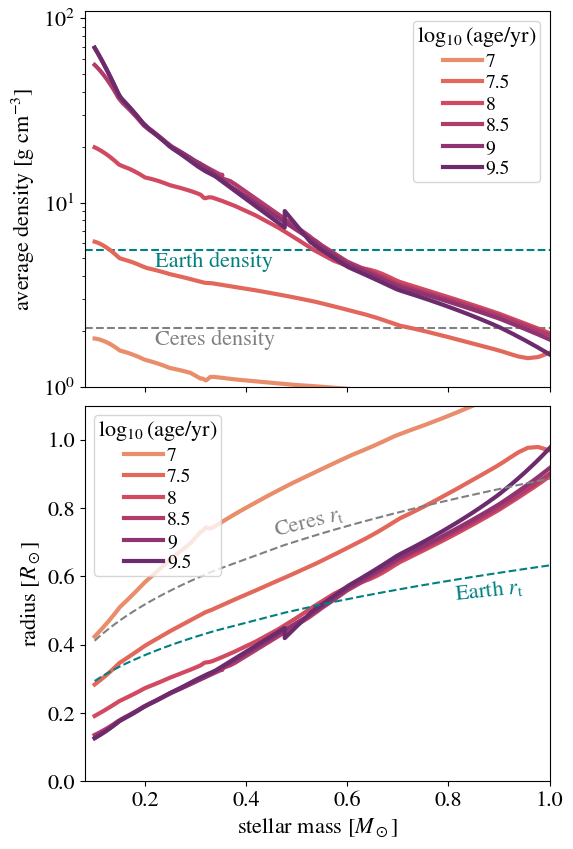

In [12]:
iso = read_mist_models.ISO('MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')


agelist = [7,7.5,8,8.5,9,9.5]

mycm = sns.color_palette("flare", len(agelist))


plt.subplots(ncols=1,nrows=2,sharex=True,figsize=(6,10))

plt.subplot(211)
for i,myage in enumerate(agelist):
    age_ind = iso.age_index(myage) #returns the index for the desired age
    sel = iso.isos[age_ind]['phase']<1
    mass = iso.isos[age_ind][sel]['star_mass']
    radius = 10**iso.isos[age_ind][sel]['log_R']
    plt.semilogy(mass ,mass*2e33 / (4/3*np.pi*(radius*7e10)**3), color=mycm[i], lw=3,label=myage ) 

plt.legend(loc='upper right',title=r'$\log_{10}$(age/yr)',frameon=True)
plt.axhline(5.51,color='Teal',linestyle='--',zorder=0)
plt.axhline(2.08,color='grey',linestyle='--',zorder=0)
plt.annotate('Ceres density',(0.22,1.7),color='grey')
plt.annotate('Earth density',(0.22,4.5),color='Teal')

plt.xlim(0.08,1)
plt.ylim(1,)
#plt.xlabel(r'stellar mass $[M_\odot]$')
plt.ylabel(r'average density [g cm$^{-3}$]')


plt.subplot(212)
for i,myage in enumerate(agelist):
    age_ind = iso.age_index(myage) #returns the index for the desired age
    sel = iso.isos[age_ind]['phase']<1
    mass = iso.isos[age_ind][sel]['star_mass']
    radius = 10**iso.isos[age_ind][sel]['log_R']
    plt.plot(mass ,radius, color=mycm[i], lw=3,label=myage ) 
    
plt.legend(loc='upper left',title=r'$\log_{10}$(age/yr)',frameon=True)
    
plt.plot(mass,(mass*2e33/(4/3*np.pi*5.51))**(1/3)  /7e10,color='Teal',ls='--' )
plt.plot(mass,(mass*2e33/(4/3*np.pi*2))**(1/3)  /7e10 ,color='grey',ls='--')
plt.annotate(r'Ceres $r_{\rm t}$',(0.45,0.72),color='grey',rotation=14)
plt.annotate(r'Earth $r_{\rm t}$',(0.81,0.53),color='Teal',rotation=6)


plt.xlim(0.08,1)
plt.ylim(0,1.1)
plt.xlabel(r'stellar mass $[M_\odot]$')
plt.ylabel(r'radius [$R_\odot$]')

plt.subplots_adjust(hspace=0.05)
plt.savefig('figs/isochrones.pdf',bbox_inches='tight')

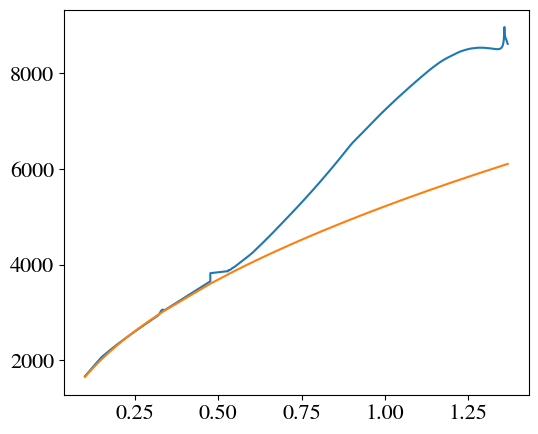

In [47]:
# testing Teff scaling

plt.plot(iso.isos[age_ind][sel]['star_mass'], 10**iso.isos[age_ind][sel]['log_Teff'] *  (3*(iso.isos[age_ind][sel]['star_mass']/0.1)**(-2/3))**-0.5 )
plt.plot(iso.isos[age_ind][sel]['star_mass'], 1650*(iso.isos[age_ind][sel]['star_mass']/0.1)**0.5)


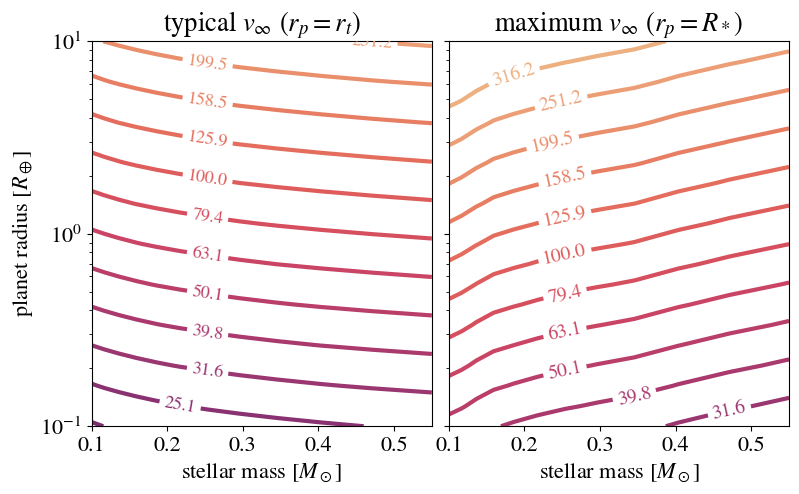

In [13]:
from matplotlib.colors import LogNorm

mycm = sns.color_palette("flare_r", as_cmap=True)
plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(9,5))
plt.subplots_adjust(wspace=0.05)

rpl = np.logspace(-1,1,20)
ms = np.logspace(-1,np.log10(0.55),12)

MM,RR = np.meshgrid(ms,rpl)

RS = np.interp(MM,mass,radius)

MP = 4/3*np.pi*5*(RR*6.4e8)**3

RP = (MM*2e33/MP)**(1/3.) * RR*6.4e8

vinfRTide = np.sqrt(2*c.G*MM*2e33*RR*6.4e8/RP**2)/1.e5
vinfMax = np.sqrt(2*c.G*MM*2e33*RR*6.4e8/(RS*7e10)**2)/1.e5


plt.subplot(121)
plt.title('typical $v_\infty$ ($r_p = r_t$)')
plt.semilogy()
#plt.xlim(0.1,1)

plt.xlabel(r'stellar mass $[M_\odot]$')
plt.ylabel(r'planet radius $[R_\oplus]$')

CS=plt.contour(MM,RR,vinfRTide,levels=np.logspace(1,2.5,16),norm=LogNorm(),cmap=mycm,linewidths=3)
plt.clabel(CS, CS.levels, inline=True, fontsize=13)
#plt.contour(MM,RR,RP/(RS*7e10),levels=[1],color='k')

plt.subplot(122)
plt.title('maximum $v_\infty$ ($r_p = R_*$)')
plt.semilogy()
#plt.xlim(0.1,1)

plt.xlabel(r'stellar mass $[M_\odot]$')
#plt.ylabel(r'planet radius $[R_\oplus]$')

CS=plt.contour(MM,RR,vinfMax,levels=np.logspace(1,2.5,16),norm=LogNorm(),cmap=mycm,linewidths=3)
plt.clabel(CS, CS.levels, inline=True, fontsize=14)
plt.savefig('figs/vel_contours.pdf',bbox_inches='tight')